In [108]:
import numpy as np
import pandas as pd

In [109]:
df = pd.read_csv('spam.csv')

In [110]:
df.sample()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
1991,ham,No other Valentines huh? The proof is on your ...,NaN,NaN,NaN


In [111]:
df.shape

(5572, 5)

Data transformation and cleaning

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [113]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [114]:
df.sample(5)


,v1,v2
4775,ham,Quite lor. But dun tell him wait he get compla...
2344,ham,Okie...
1302,ham,FRAN I DECIDED 2 GO N E WAY IM COMPLETELY BROK...
2016,ham,"Princess, is your kitty shaved or natural?"
2286,ham,I have had two more letters from . I will copy...


In [115]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
3396,ham,Heehee that was so funny tho
4096,ham,i am going to bed now prin
255,ham,Don't necessarily expect it to be done before ...
2173,ham,"Hiya, had a good day? Have you spoken to since..."
2686,ham,There r many model..sony ericson also der.. &l...


In [116]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [117]:
df['target'] = encoder.fit_transform(df['target'])

In [118]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [119]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [120]:
df.duplicated().sum()

403

In [121]:
df = df.drop_duplicates(keep='first')

In [122]:
df.shape

(5169, 2)

Data Analsyis

In [123]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [124]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

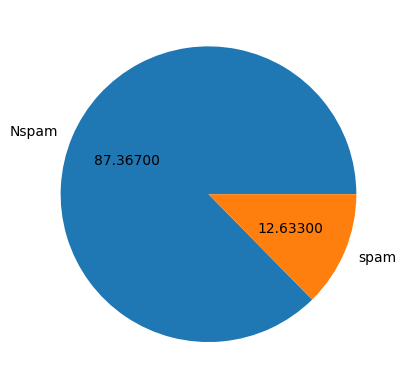

In [125]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['Nspam','spam'],autopct="%0.5f")
plt.show()

# As the data is ibalanced 

In [126]:
!pip install nltk

In [127]:
import nltk

In [128]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\SAI\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [129]:
df['num_characters'] = df['text'].apply(len)

In [130]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [131]:
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [132]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [133]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [134]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.924163,18.456761,1.966531
std,58.175349,13.325633,1.449833
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [135]:
# not spam 
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.457263,17.123782,1.820195
std,56.357463,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [136]:
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.479326,27.675345,2.978560
std,30.014336,7.011513,1.493185
min,13.000000,2.000000,1.000000
25%,131.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,9.000000


In [137]:
import seaborn as sn

<Axes: xlabel='num_characters', ylabel='Count'>

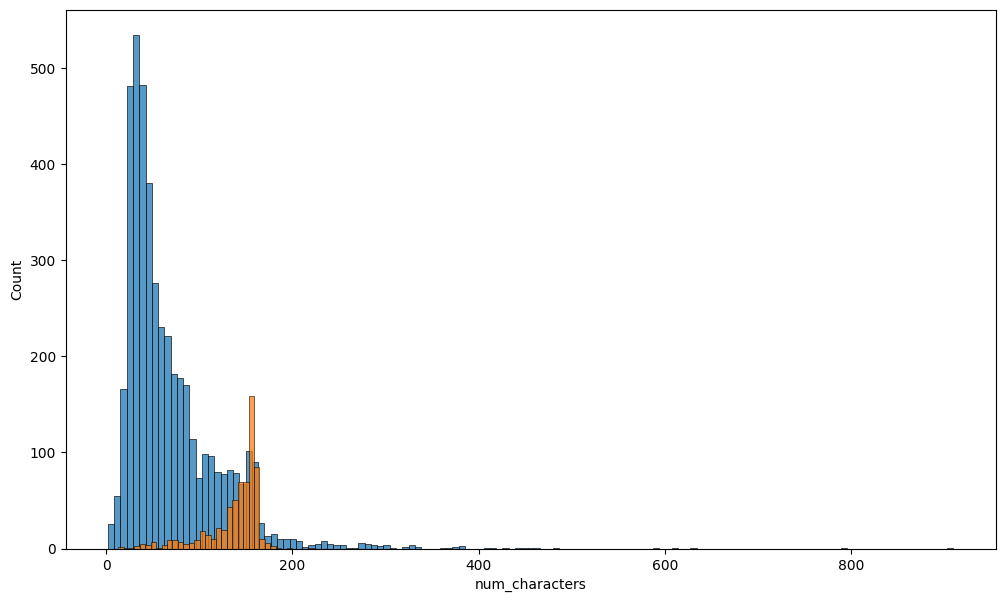

In [138]:
plt.figure(figsize=(12,7))
sn.histplot(df[df['target']==0]['num_characters'])
sn.histplot(df[df['target']==1]['num_characters'])

<Axes: xlabel='num_words', ylabel='Count'>

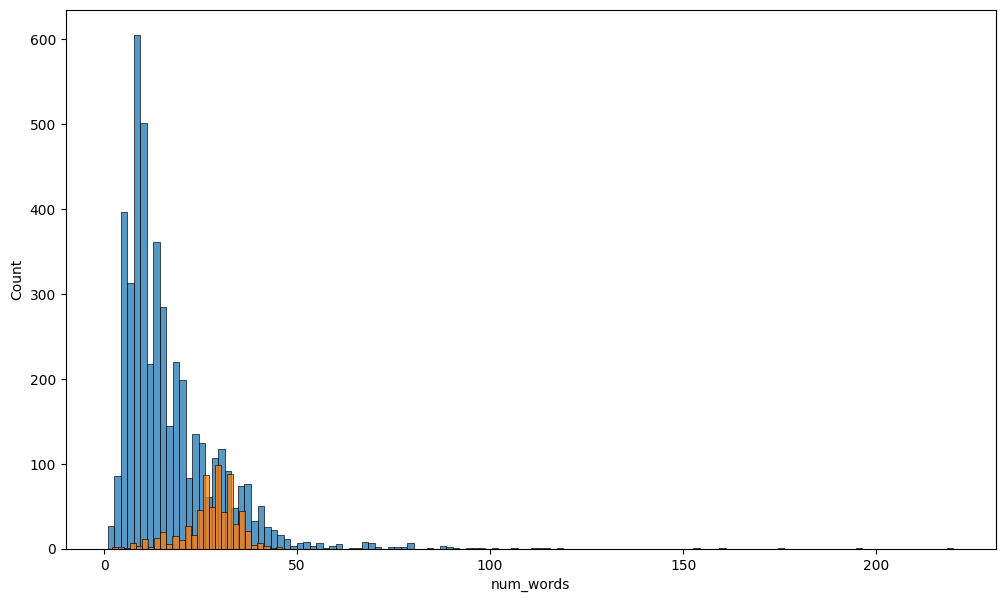

In [139]:
plt.figure(figsize=(12,7))
sn.histplot(df[df['target']==0]['num_words'])
sn.histplot(df[df['target']==1]['num_words'])

<Axes: xlabel='num_sentences', ylabel='Count'>

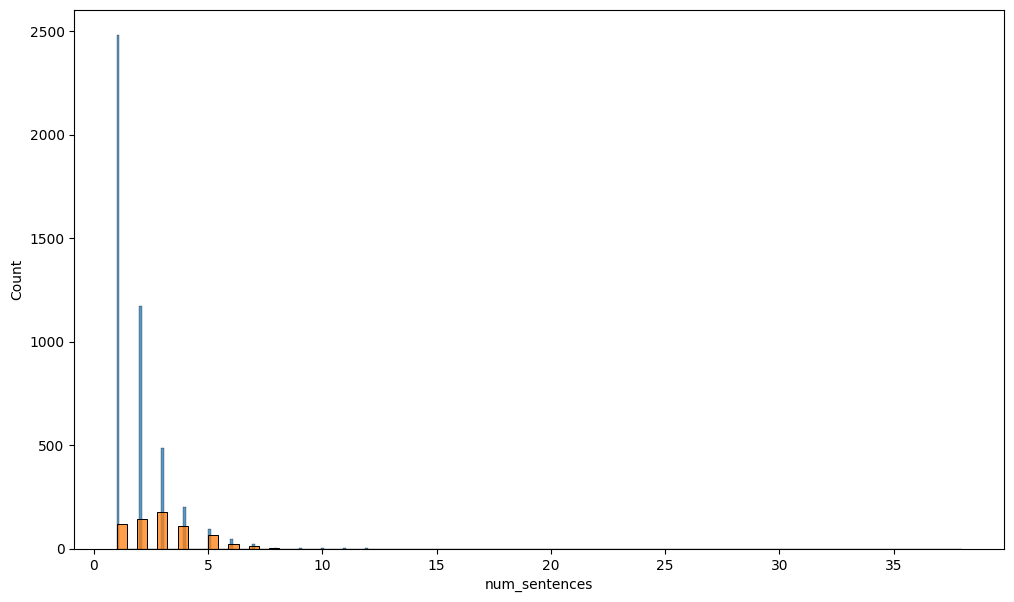

In [140]:
plt.figure(figsize=(12,7))
sn.histplot(df[df['target']==0]['num_sentences'])
sn.histplot(df[df['target']==1]['num_sentences'])

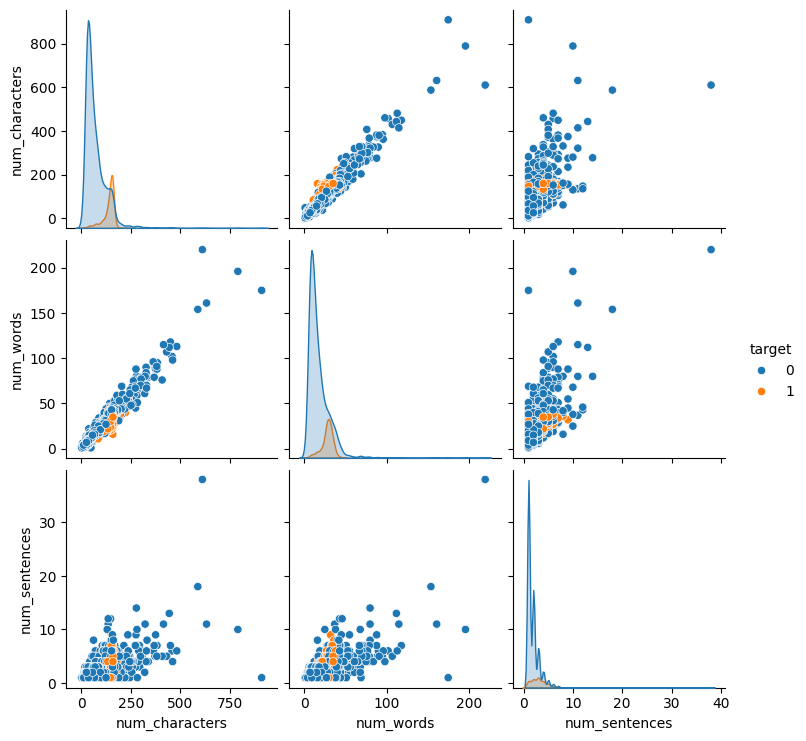

In [141]:
sn.pairplot(df,hue='target')
plt.show()

In [142]:
#best accoridng to above analysis is to use the num_characters or num_ words while num_characters is best to use

In [150]:
sn.heatmap(df.corr())

ValueError: could not convert string to float: 'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'